# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x#Defines the tensorflow version
import tensorflow as tf#import the library
tf.__version__#tf version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.14.0'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [ ]:
temperature_df=pd.read_csv('/content/Celsius-to-Fahrenheit.csv')

In [ ]:
temperature_df.reset_index(drop=True, inplace=True)#drop=True => Apaga o indice se houver algum indice salvo na variável | inplace=True => Significa que as modificações serão feitas na própria variável temperature

In [ ]:
temperature_df.info()#Return info of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
temperature_df.describe()#Returns the min and max value, mediana, media e etc

Celsius  Fahrenheit
count  30.000000   30.000000
mean    2.000000   35.600000
std    22.780815   41.005466
min   -50.000000  -58.000000
25%    -6.750000   19.850000
50%     0.500000   32.900000
75%     7.750000   45.950000
max    60.000000  140.000000

# Etapa 3: Visualização da base de dados

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

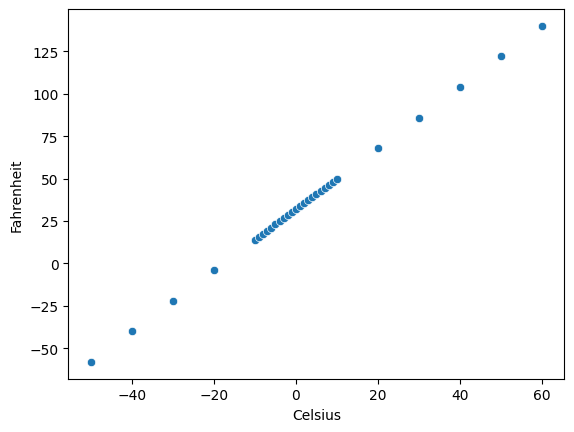

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])#Mostra um gráfico da nossa base de dados

# Etapa 4: Configuração da base de dados de treinamento

In [ ]:
x_train=temperature_df['Celsius']
y_train=temperature_df['Fahrenheit']

In [ ]:
x_train.shape()

In [ ]:
y_train.shape()

# Etapa 5: Construção e treinamento do modelo

In [ ]:
model=tf.keras.Sequential()#This type of model is a simple way to build a neural network where linear layers are added sequentially, one after another.
#Keras is a high-level neural network API
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
#model.add(): This method is used to add a layer to a TensorFlow Sequential model.
#tf.keras.layers.Dense(): This function creates a dense (fully connected) layer. A dense layer connects each neuron in one layer to every neuron in the next layer.
#units=1: This parameter specifies the number of neurons (or units) in the dense layer. In this case, there is a single neuron in the layer.
#input_shape=[1]: This parameter defines the shape of the input data expected by this layer


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
#model.compile: This method is used to compile the model before training. It prepares the model for the training process by specifying additional settings necessary for training, such as the optimizer and loss function.
#optimizer=tf.keras.optimizers.Adam(0.5): This parameter sets the optimizer for the training process. In this case, it uses the Adam optimizer with a learning rate of 0.5.
#loss='mean_squared_error': This parameter specifies the loss function used during training. Here, it uses the mean squared error (MSE) as the loss function. MSE is often used in regression problems where the goal is to minimize the squared difference between the predicted and actual values.

In [ ]:
epochs_hist=model.fit(x_train, y_train, epochs=500)#Commit the training and storage the training infomations

Epoch 1/500
1/1 [==============================] - 0s 11ms/step - loss: 1.3551
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 1.2053
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0648
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9338
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8157
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7136
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6266
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5509
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4818
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4173
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3584
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 0.3070
Epoch 13/500
1/1 [==============================] - 0s 9ms

# Etapa 6: Avaliação do modelo


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

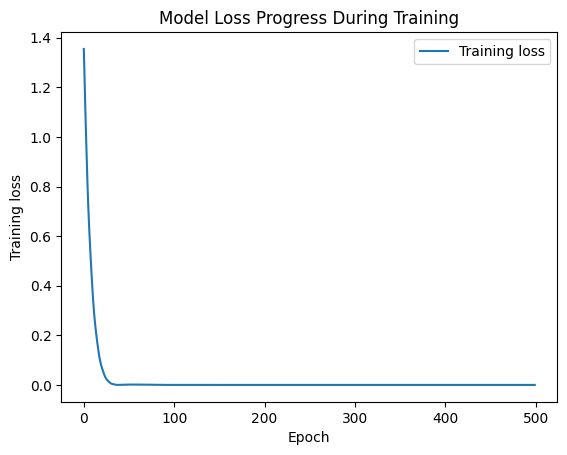

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

In [ ]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.00002], dtype=float32)]

In [ ]:
temp_c1=10
temp_f1=model.predict([temp_c1])
temp_f1

1/1 [==============================] - 0s 30ms/step


array([[50.00002]], dtype=float32)

In [ ]:
temp_c2=10
temp_f2=temp_c2*1.8+32
temp_f2

50.0